# <center><u><font face="Consolas">Web application to detect fake news using supervised machine learning classification models</font></u><center>

<font face="Segoe UI">**Task**<br><br> To build and deploy a web application to detect fake news using supervised machine learning classification models.<br></font>

<font size=3 face="Consolas">__Table of contents__</font>
<font face="Consolas">
- <a href="#Import-data" style="text-decoration: none">Import data</a>
- <a href="#Structure-of-the-data" style="text-decoration: none">Structure of the data</a>
- <a href="#EDA-and-Data-cleaning" style="text-decoration: none">EDA and Data cleaning</a>
    - <a href="#Missing-value-treatment" style="text-decoration: none">Missing value treatment</a>
    - <a href="#Data-Transformation" style="text-decoration: none">Data Transformation</a>
    - <a href="#Check-Data-imbalance" style="text-decoration: none">Check Data imbalance</a>
    - <a href="#Changing-dtypes-of-columns" style="text-decoration: none">Changing dtypes of columns</a>
- <a href="#Data-Pre-processing" style="text-decoration: none">Data Pre processing</a>
    - <a href="#Vectorization" style="text-decoration: none">Vectorization</a>
- <a href="#Model-building-and-Evaluation" style="text-decoration: none">Model building and Evaluation</a>
    - <a href="#Naive-Bayes" style="text-decoration: none">Naive Bayes</a>
    - <a href="#Logistic-Regression" style="text-decoration: none">Logistic Regression</a>
    - <a href="#Linear-SVC" style="text-decoration: none">Linear SVC</a>
    - <a href="#XG-Boost" style="text-decoration: none">XG Boost</a>
- <a href="#Model-Testing" style="text-decoration: none">Model Testing</a>
- <a href="#Conclusion" style="text-decoration: none">Conclusion</a>
</font>

### <font face="Consolas">Import data</font>

In [1]:
# Importing the required packages for EDA.

import numpy as np
import pandas as pd

# Importing packages required for visualizing the data.

import matplotlib.pyplot as plt
import seaborn as sns

# To view all more columns in the output.

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import warnings # To ignore warnings.
warnings.filterwarnings('ignore')

In [2]:
%%HTML
<!-- #The following piece of code adds a border to the output of Pandas dataframes to make it look cleaner. -->
<style type='text/css'>
    table.dataframe th, table.dataframe td{
        border: 1px solid #999;
    }
    table.dataframe th{
        background-color: #ccc;
    }
</style>

### <font face="Consolas">Structure of the data</font>

In [3]:
# Reading the data file

true = pd.read_csv("Dataset/True.csv")
fake = pd.read_csv("Dataset/Fake.csv")

In [4]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
# Randomly delete columns in both true and fake to get 10k rows for the project

np.random.seed(10)
true_drop = np.random.choice(true.index, 16417, replace=False)
true = true.drop(true_drop)

np.random.seed(10)
fake_drop = np.random.choice(fake.index, 18481, replace=False)
fake = fake.drop(fake_drop)

In [7]:
# label the data

true['label'] = 1
fake['label'] = 0

In [8]:
# Concat both the datsets true and fake

df = pd.concat([true, fake], axis=0)

In [9]:
# shuffle the dataset

np.random.seed(100)
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,title,text,subject,date,label
0,INFLUENTIAL HOLLYWOOD LEFTIST Looks Forward To...,How very progressive Not since the Civil Right...,politics,"Feb 26, 2016",0
1,BUSTED! ONE OF NATION’S BIGGEST POLITICAL DONO...,I wonder if they ll get the same treatment Din...,left-news,"Nov 2, 2016",0
2,"No rest, high tempo - energetic Macron keeps E...",PARIS (Reuters) - From text messages at 2 a.m....,worldnews,"October 25, 2017",1
3,U.S. attorney general deflects lawmakers' ques...,WASHINGTON (Reuters) - The top U.S. law enforc...,politicsNews,"July 12, 2016",1
4,Lebanon president seeks diplomatic help on PM ...,BEIRUT (Reuters) - Lebanese President Michel A...,worldnews,"November 9, 2017",1


In [12]:
df.shape

(10000, 5)

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10000 non-null  object
 1   text     10000 non-null  object
 2   subject  10000 non-null  object
 3   date     10000 non-null  object
 4   label    10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [14]:
df.describe()

,label
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### <font face="Consolas">EDA and Data cleaning</font>

In [15]:
# Creating a function which returns the sum of missing values (with percentage) in a dataframe.

def missingVal_percentage(dataframe):
    return(pd.DataFrame({'Missing_Values': dataframe.isnull().sum(),
                         'Percentage': round(100*(dataframe.isnull().sum()/len(dataframe)),2)}))

#### <font face="Consolas">Missing value treatment</font>

In [16]:
# Missing values in the dataset.

missingVal_percentage(df)

,Missing_Values,Percentage
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
label,0,0.0


### <font face="Consolas">Check Data imbalance</font>

<AxesSubplot:xlabel='label', ylabel='count'>

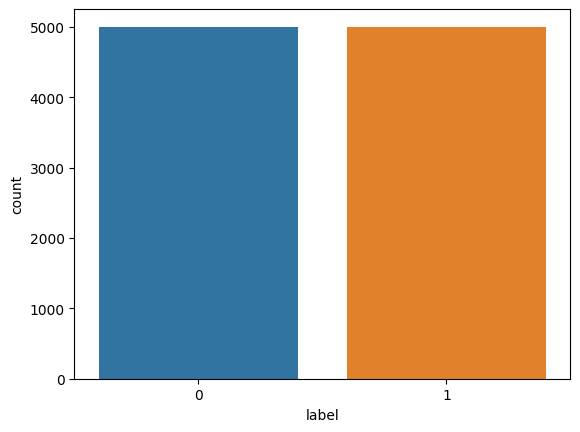

In [18]:
# checking for data imbalance

plt.xticks(rotation=0)
sns.countplot(df['label'])

In [20]:
# column inspection

df['subject'].describe()

count            10000
unique               8
top       politicsNews
freq              2607
Name: subject, dtype: object

<AxesSubplot:xlabel='subject', ylabel='count'>

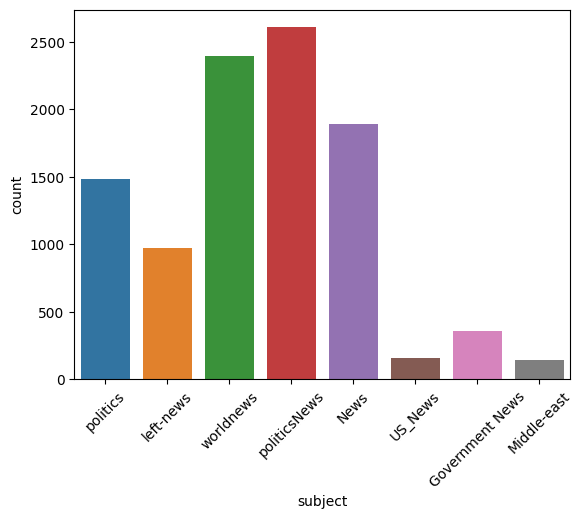

In [21]:
# Plotting the data 

plt.xticks(rotation=45)
sns.countplot(df['subject'])

### <font face="Consolas">Data transformation</font>

In [22]:
# Transforming the unmatching subjects to the same notation
df.subject=df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews',
                               'News':'WorldNews','worldnews':'WorldNews'})

### <font face="Consolas">Changing dtypes of columns</font>

In [23]:
# checking date column - 2017 has most news
df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True )
df['year'] = df['date'].dt.year
df['year'].value_counts()

2017.0    5886
2016.0    3567
2015.0     536
2018.0       7
Name: year, dtype: int64

In [24]:
# drop columns that are unncessary after analysing

del df['date']
del df['year']

In [25]:
df_model =  df.copy()

In [26]:
df_model.reset_index(inplace=True)

In [27]:
df_model.head()

,index,title,text,subject,label
0,0,INFLUENTIAL HOLLYWOOD LEFTIST Looks Forward To...,How very progressive Not since the Civil Right...,PoliticsNews,0
1,1,BUSTED! ONE OF NATION’S BIGGEST POLITICAL DONO...,I wonder if they ll get the same treatment Din...,left-news,0
2,2,"No rest, high tempo - energetic Macron keeps E...",PARIS (Reuters) - From text messages at 2 a.m....,WorldNews,1
3,3,U.S. attorney general deflects lawmakers' ques...,WASHINGTON (Reuters) - The top U.S. law enforc...,PoliticsNews,1
4,4,Lebanon president seeks diplomatic help on PM ...,BEIRUT (Reuters) - Lebanese President Michel A...,WorldNews,1


In [28]:
df_model['title'][2]

'No rest, high tempo - energetic Macron keeps Elysee agenda ticking'

In [29]:
df_model['text'][2]

'PARIS (Reuters) - From text messages at 2 a.m. to clockwork meetings and tight deadlines, 39-year-old Emmanuel Macron is shaking up how the French presidency is run, raising the tempo and stretching the limits of the largely youthful team around him. France s political magazines are full of snippets every week about the inner workings of Macron s Elysee, whether the comings and goings of his rescue dog Nemo or details of messages sent to the foreign minister in the dead of night. But foreign diplomats dealing with the administration also describe a different pace and style of work, saying the young president, with a background in investment banking and civil service, has injected fresh elan into the role. Half a dozen senior European envoys, speaking to Reuters on condition of anonymity, expressed similar views on the sharpness, energy and openness of Macron and his team, whether on specific policy discussions or wider bilateral issues. While they were quick to emphasize that former P

### <font face="Consolas">Data Pre processing</font>

In [32]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df_model)):
    review = re.sub('[^a-zA-Z]', ' ', df_model['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durgashree/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
len(corpus)

10000

In [35]:
corpus[0]

'progress sinc civil right movement america seen racial divid cours know behind manufactur race war america barack obama work unison race agit hollywood idiot like harvey weinstein will suffer consequ humili racist comedian front million mean absolv sin hire enough black peopl co chief weinstein co acknowledg academi poor track record come film peopl color includ feel blame belong studio distributor peopl work hard live prize academi card reach zenith go retir imagin chri rock open remark harvey weinstein co chief weinstein co say sit record episod award chatter podcast day ahead sunday rock host th academi award anybodi plan boycot oscar chri rock gonna annihil everi one us leader hollywood studio distribut compani first minut show well worth watch oscar rememb year first time sinc one time last year none weinstein film nomin best pictur carol hate eight came short still go show hope best origin score win hate compos ennio morricon among other associ weinstein co film well best actor 

### <font face="Consolas">Vectorization</font>

In [36]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [37]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [38]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df['label']

In [39]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### <font face="Consolas">Model building and Evaluation</font>

In [40]:
# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Computations
import itertools

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <font face="Consolas">Naive Bayes</font>

0.924


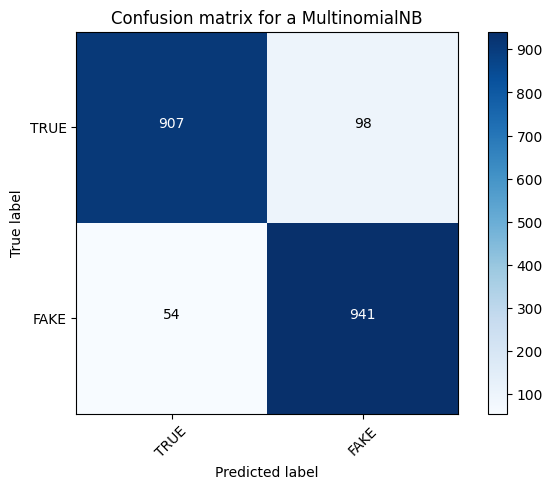

In [47]:
nb = MultinomialNB(alpha = 0.1)
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
acc_nb = metrics.accuracy_score(y_test, pred_nb)
print(acc_nb)

cm_nb = metrics.confusion_matrix(y_test, pred_nb, labels=[0,1])
plot_confusion_matrix(cm_nb, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB')

### <font face="Consolas">Logistic Regression</font>

0.986


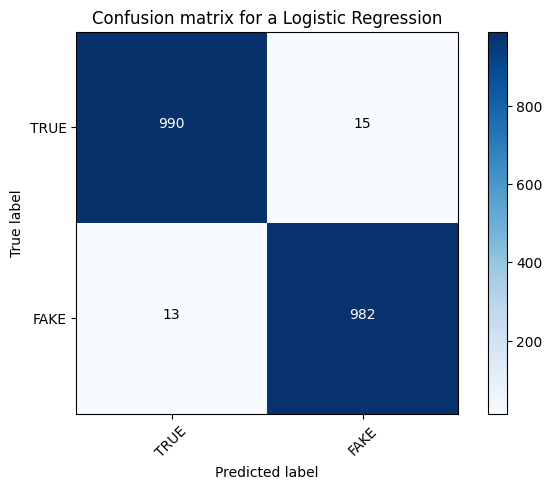

In [48]:
lg = LogisticRegression(C=1e5)
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
acc_lg = metrics.accuracy_score(y_test,pred_lg)
print(acc_lg)

cm_lg = metrics.confusion_matrix(y_test, pred_lg, labels=[0,1])
plot_confusion_matrix(cm_lg, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression')

### <font face="Consolas">Linear SVC</font>

0.9885


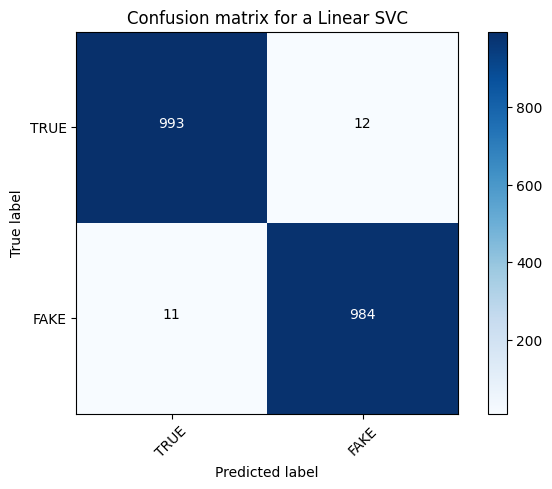

In [49]:
svc = LinearSVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
acc_svc = metrics.accuracy_score(y_test, pred_svc)
print(acc_svc)

cm_svc = metrics.confusion_matrix(y_test, pred_svc, labels=[0,1])
plot_confusion_matrix(cm_svc, classes=['TRUE','FAKE'], title ='Confusion matrix for a Linear SVC')

### <font face="Consolas">XG Boost</font>

0.992


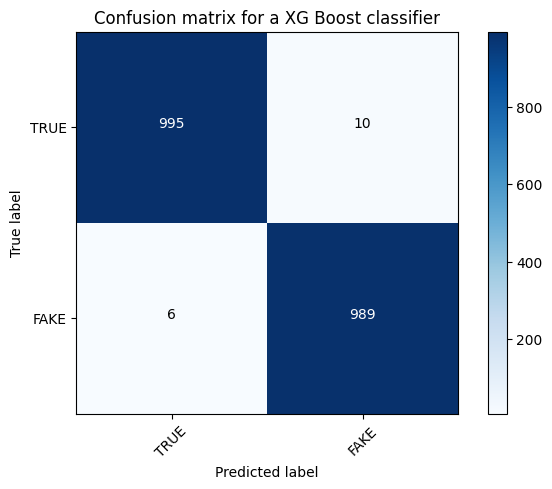

In [54]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
pred_xg = xg.predict(X_test)
acc_xg = metrics.accuracy_score(y_test, pred_xg)
print(acc_xg)

cm_xg = metrics.confusion_matrix(y_test, pred_xg, labels=[0,1])
plot_confusion_matrix(cm_xg, classes=['TRUE','FAKE'], title ='Confusion matrix for a XG Boost classifier')

### <font face="Consolas">Model Testing</font>

In [55]:
# test on random data

review = re.sub('[^a-zA-Z]', ' ', fake['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'think gun grabber chief next virginia state senat bill carrico r dist respond governor terri mcauliff relentless gun control push introduc budget amend remov fund mcauliff protect detail carrico said afraid gun go surround arm state policemen mcauliff push numer gun control governor august infam push expand background check virginia report alison parker shot air mcauliff made push expand background check gunman kill parker caught therefor knowledg gunman acquir gun turn gunman vester lee flanagan acquir gun via background check moreov octob mcauliff issu execut order ban open carri firearm state build use virginia execut branch call enforc ensur peopl busi sell gun virginia feder firearm licens ffl senat carrico respond thing tri sure mcauliff around gun bother much accord bristol herald courier carrico said address matter gener assembl conven januari say lot governor power defer gener assembl point get colleagu circumv everyth governor done point budget amend look take away execut pr

In [56]:
val = tfidf_v.transform([review]).toarray()

In [58]:
xg.predict(val)

array([0])

In [61]:
#save model
import joblib
joblib.dump(xg, 'final_model.pkl')
joblib.dump(tfidf_v, 'final_tfidfvect.pkl')
joblib_model = joblib.load('final_model.pkl')
joblib_tfidfvect = joblib.load('final_tfidfvect.pkl')
val_pkl = joblib_tfidfvect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0])

### <font face="Consolas">Conclusion</font>

#### XG Boost model performed better as compared to others with 99.2% accuracy